<h1 style="text-align:center">Data Science and Machine Learning Capstone Project</h1>
<p style="text-align:center">IBM: DS0720EN</p>
<img style="text-align:center" src="https://prod-edxapp.edx-cdn.org/static/edx.org/images/logo.790c9a5340cb.png">
<p style="text-align:center">1 of 4</p>

# Table of Contents
1. [Problem](#problem)
    1. [Statement](#statement)
    2. [Questions](#questions)
2. [Question addressed by this Notebook](#questionheading)
    1. [Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?](#question)
3. [Answer](#answerheading)
    1. [HEAT/HOT WATER (including HEATING)](#answer)
4. [Approach](#approach)
5. [Analysis](#analysis)
    1. [Examination](#examination)
    2. [Wrangling](#wrangling)
    3. [Images](#images)
        1. [Bar Chart](#barchart)
6. [Insights](#insights)
7. [Reasoning](#reasoning)
8. [Appendix A: Data](#data)
    1. [Source](#datasource)
    2. [IBM Cloud](#datacloud)
    3. [Local](#datalocal)

<a id="problem"></a>
## Problem
---

<a id="statement"></a>
### Statement

The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 complaints that are related to housing and buildings.

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, the Department of Housing Preservation and Development has approached your organization to help them manage the large volume of 311 complaints they are receiving every year.

The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their  questions:

<a id="questions"></a>
### Questions

1.  Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?
2.  Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?
3.  Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?
4.  Can a predictive model be built for a future prediction of the possibility of complaints of the type that you have identified in response to question 1?

<a id="questionheading"></a>
## Question addressed by this Notebook
---

<a id="question"></a>
### Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

<a id="answerheading"></a>
## Answer
---

<a id="answer"></a>
### HEAT/HOT WATER (including HEATING)

<a id="approach"></a>
## Approach
---

Examine the data to see if there is any complaint type that is more common than the others.  If there is no front-runner, then consider other factors.

<a id="analysis"></a>
## Analysis
---

Use code snippets from [Appendix A: Data](#data) as needed to load the dataframe first.

<a id="examination"></a>
### Examination

In [15]:
df.complaint_type.isnull().sum()

0

<p style="color:Red;">None of the complaint types are null.</p>

In [16]:
df['complaint_type'].describe()

count            5862383
unique                29
top       HEAT/HOT WATER
freq             1152592
Name: complaint_type, dtype: object

<p style="color:Red;">HEAT/HOT WATER is the most common of the 29 unique complaint types, but closer examination is necessary to make a final answer to the question.</p>

In [17]:
unique_types = df['complaint_type'].unique()
unique_types.sort()
unique_types

array(['AGENCY', 'APPLIANCE', 'Appliance', 'CONSTRUCTION', 'DOOR/WINDOW',
       'ELECTRIC', 'ELEVATOR', 'FLOORING/STAIRS', 'GENERAL',
       'GENERAL CONSTRUCTION', 'General', 'HEAT/HOT WATER', 'HEATING',
       'HPD Literature Request', 'Mold', 'NONCONST', 'OUTSIDE BUILDING',
       'Outside Building', 'PAINT - PLASTER', 'PAINT/PLASTER', 'PLUMBING',
       'Plumbing', 'SAFETY', 'STRUCTURAL', 'Safety',
       'UNSANITARY CONDITION', 'Unsanitary Condition', 'VACANT APARTMENT',
       'WATER LEAK'], dtype=object)

<a id="wrangling"></a>
### Wrangling
Adjust and add columns. Including adjustments and new columns to facilitate graphing. 

<p style="color:Red;">Some of these appear to be duplicate ways to represent the same thing.  The Open Data Page does not provide any clarification of these values, in case for example, water leaks should be lumped in with plumbing.  In a more real situation we could ask for such clarification.  If that was not available an analysis of whether apparent duplicates come from different Open_Data_Channel_Type could help formulate the best guess why there are apparent duplicates.</p>

In [22]:
#Although we may need dummy values for later questions, for now just normalize the data in-place.
#Using best guess interpretation about which complaint types are equivalent to each other.
df['complaint_type'].replace('Appliance', 'APPLIANCE', inplace = True)
df['complaint_type'].replace('GENERAL CONSTRUCTION', 'CONSTRUCTION', inplace = True)
df['complaint_type'].replace('General', 'GENERAL', inplace = True)
df['complaint_type'].replace('HEATING', 'HEAT/HOT WATER', inplace = True)
df['complaint_type'].replace('Outside Building', 'OUTSIDE BUILDING', inplace = True)
df['complaint_type'].replace('PAINT - PLASTER', 'PAINT/PLASTER', inplace = True)
df['complaint_type'].replace('Plumbing', 'PLUMBING', inplace = True)
df['complaint_type'].replace('Safety', 'SAFETY', inplace = True)
df['complaint_type'].replace('Unsanitary Condition', 'UNSANITARY CONDITION', inplace = True)

In [23]:
print(df['complaint_type'].describe())
unique_types = df['complaint_type'].unique()
unique_types.sort()
unique_types

count            5862383
unique                20
top       HEAT/HOT WATER
freq             2040461
Name: complaint_type, dtype: object


array(['AGENCY', 'APPLIANCE', 'CONSTRUCTION', 'DOOR/WINDOW', 'ELECTRIC',
       'ELEVATOR', 'FLOORING/STAIRS', 'GENERAL', 'HEAT/HOT WATER',
       'HPD Literature Request', 'Mold', 'NONCONST', 'OUTSIDE BUILDING',
       'PAINT/PLASTER', 'PLUMBING', 'SAFETY', 'STRUCTURAL',
       'UNSANITARY CONDITION', 'VACANT APARTMENT', 'WATER LEAK'],
      dtype=object)

<p style="color:Red;">Twenty complaint types after consolidating obvious duplicates.  HEAT/HOT WATER still the most prevalent.</p>

Add a column that converts the complaint type to a number.

In [105]:
import numpy as np
complaint_types = dict(np.ndenumerate(unique_types)) #convert unique list to a dictionary.
complaint_types = {v: k for k, v in complaint_types.items()} #transpose values and index.
complaint_types = {k: v[0] for k, v in complaint_types.items()} #simplify the values from tuple to integer.

In [109]:
#copy the values to a new column
df['numeric_type'] = df['complaint_type']
#replace with the dictionary values.
df['numeric_type'].replace(to_replace=complaint_types, inplace=True)

<a id="images"></a>
### Images
To double check any preliminary conclusions from the examination above and/or to gain other insights.

<a id="barchart"></a>
#### Bar Chart

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

In [78]:
totals = pd.DataFrame(df['complaint_type'].value_counts())

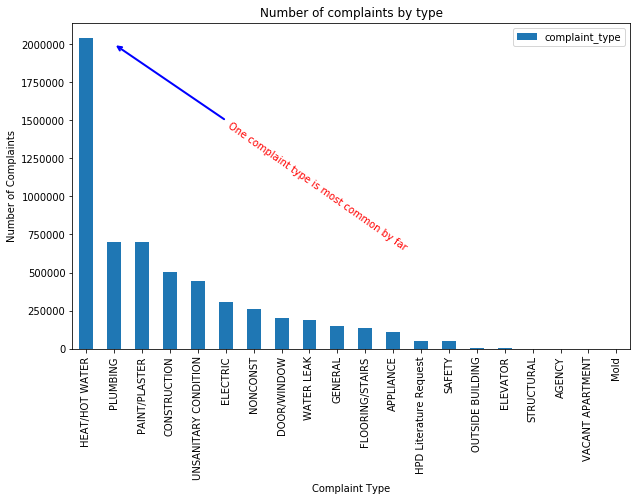

In [80]:
totals.plot(kind='bar',figsize=(10,6), rot=90)
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")
plt.title("Number of complaints by type")
plt.annotate('', xycoords='data',
             xy=(1, 2000000), # head
             xytext=(5, 1500000), # tail
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.annotate('One complaint type is most common by far',
             xy=(5, 1500000), # start 
             va='top', ha='left', rotation=-35,
             color = 'r'
            )
plt.show()

<a id="insights"></a>
## Insights
---

None of the complaint types are entered as null, but some are duplicates of each other.

One type of complaint is more common than the others.

<a id="reasoning"></a>
## Reasoning
---

Which complaint type should they focus on first?  The most common one.

<a id="data"></a>
## Appendix A: Data

<a id="datasource"></a>
### Source

<ul>
<li>The course provides the data sources to use as these:
    
[New York City 311 SODA API Endpoint](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)<br/>
[Primary Land Use Tax Lot Output PLUTO housing dataset](https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip).

<li>A little poking around yields two additional resources: 
    
[Open Data Page schema](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9)<br/>
[SODA documentation](https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv)

<li>The course provides a link that lets us download a subset of the entire 311 data set.  Only certain columns, sets a maximum number of rows, and limits to the Department of Housing Preservation and Development:
    
[SODA URL](https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status)

<li>I will create two additional SODA URL to use for this project:
<li>Because the first quiz asks questions only pertaining through December 2018:

[Through 2018 Only](https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status&$where=created_date%3C%3D%272018-12-31T23:59:59.999%27)

<li>The data set is still very large, so I will break off just one year to use during initial examination when I am figuring out what approach I will take:  

[2018 Only](https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status&$where=created_date%20between%20%272018-01-01T00:00:00.000%27%20and%20%272018-12-31T23:59:59.999%27)

<li>The data sets will be read directly into a Pandas Dataframe then saved as "pickle" files.  Either locally or in the IBM Cloud, depending on where the notebook is being run.
</ul>

In [1]:
import pandas as pd

In [8]:
#df = pd.read_csv("https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status&$where=created_date%3C%3D%272018-12-31T23:59:59.999%27", parse_dates=[1,13])

In [7]:
#df.head()

<a id="datacloud"></a>
### IBM Cloud

Code snippets for Uploading and Downloading pickle files between a Pandas data frame and the IBM Cloud.

In [11]:
# Import IBM specific imports here.

In [ ]:
# Create variables needed for IBM Cloud operations.

# The values needed to replace the "xxx" placeholders in the following sections should be kept secret.
# Do not keep them in any notebook that is then uploaded to anywhere publically visible.
# These can be obtained by invoking the Watson Studio "insert to code" functionality on any uploaded file.
# That will generate code with the required values.
# Copy / paste from that generated code then discard the generated code.

# Create a credentials variable.
client_cred = ibm_boto3.client(service_name='xxx',
ibm_api_key_id='xxx',
ibm_auth_endpoint='xxx',
config=Config(signature_version='xxx'),
endpoint_url='xxx')

# Create a bucket variable.
bucket = 'xxx'

In [ ]:
# "Save"
#Create a pickle file from a dataframe:
df.to_pickle('./df_raw.pkl')
#Upload a pickle (PKL) file to the IBM Cloud Object Store:
client_cred.upload_file('./df_raw.pkl',bucket,'df_raw_cos.pkl')

In [ ]:
# "Load"
#Download a pickle file from IBM Cloud Object Store:
client_cred.download_file(Bucket=bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')
#Fill a Dataframe from of the pickle file:
df = pd.read_pickle('./df_raw_local.pkl')

In [9]:
#df.head()

<a id="datalocal"></a>
### Local

To avoid using up IBM Cloud monthly Capacity Unit Hours (CUH) while working on the notebook, the notebook can be hosted on a local machine runnning Jupyter Notebook.  Here are some code snippets for saving and loading Pandas data frames as local files:

In [11]:
import pandas as pd
#set variables to make either operation easier
file_path_local = 'C:\\Users\\It_Co\\Documents\\DataScience\\Capstone\\'
filename_full = 'ny311full.pkl'
filename_small = 'ny311small.pkl'
filename_truncated = 'ny311truncated.pkl'

In [4]:
#Save
#Create a pickle file from a dataframe.
df.to_pickle(file_path_local + filename_truncated)

In [12]:
#Load
#Fill a dataframe from a pickle file.
df = pd.read_pickle(file_path_local + filename_full)

In [14]:
#df.head()